
**Problem Statment**:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.
The company wants to know :

*     Which variables are significant in predicting the demands for shred bikes.
*     How well those variables describe the bike demands.



In [1]:
# Importing essential Libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## **Data Reading,Understanding and Preparation**

In [3]:
# Read and view the Dataset
br_df = pd.read_csv('day.csv')
print(br_df.shape)
br_df.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Get to know about type of Data
br_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#checking for null values

br_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

   . We don't need the Feature 'instant',it is just serial number of the dataset.
   . We don't need the Feature 'dtday' because it is already expalained by the other features like: yr, mnth, weekday, workingday and holiday.

In [11]:
br_df = br_df.drop(['instant','dteday'],axis =1) # instant is just data row index that no need for analyze and dteday is the datatime it not required for analyze
br_df = br_df.drop(['casual','registered'],axis =1) # cnt output data is addition of both the causual and registered and not required for analyze
br_df = br_df.drop(['atemp'],axis =1) #atemp is not needed as temp is already being used

#### dummy variables encoding for season, mnth, weatheris and weekday

In [14]:
br_df['season']=br_df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
br_df['mnth']=br_df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
br_df['weathersit']=br_df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
br_df['weekday']=br_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

br_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [16]:
month = pd.get_dummies(br_df.mnth, drop_first=True, dtype=int)
weekday = pd.get_dummies(br_df.weekday, drop_first=True, dtype=int)
weathersit = pd.get_dummies(br_df.weathersit, drop_first=True, dtype=int)
season = pd.get_dummies(br_df.season, drop_first=True, dtype=int)

In [18]:
#adding the dummy variables to the original dataframe
br_df = pd.concat([br_df,month, weekday, weathersit, season], axis=1)
br_df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [20]:
br_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         730 non-null    object 
 1   yr             730 non-null    int64  
 2   mnth           730 non-null    object 
 3   holiday        730 non-null    int64  
 4   weekday        730 non-null    object 
 5   workingday     730 non-null    int64  
 6   weathersit     730 non-null    object 
 7   temp           730 non-null    float64
 8   hum            730 non-null    float64
 9   windspeed      730 non-null    float64
 10  cnt            730 non-null    int64  
 11  Aug            730 non-null    int32  
 12  Dec            730 non-null    int32  
 13  Feb            730 non-null    int32  
 14  Jan            730 non-null    int32  
 15  July           730 non-null    int32  
 16  June           730 non-null    int32  
 17  Mar            730 non-null    int32  
 18  May       

In [22]:
br_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         730 non-null    object 
 1   yr             730 non-null    int64  
 2   mnth           730 non-null    object 
 3   holiday        730 non-null    int64  
 4   weekday        730 non-null    object 
 5   workingday     730 non-null    int64  
 6   weathersit     730 non-null    object 
 7   temp           730 non-null    float64
 8   hum            730 non-null    float64
 9   windspeed      730 non-null    float64
 10  cnt            730 non-null    int64  
 11  Aug            730 non-null    int32  
 12  Dec            730 non-null    int32  
 13  Feb            730 non-null    int32  
 14  Jan            730 non-null    int32  
 15  July           730 non-null    int32  
 16  June           730 non-null    int32  
 17  Mar            730 non-null    int32  
 18  May       

##### Visualisation of the data

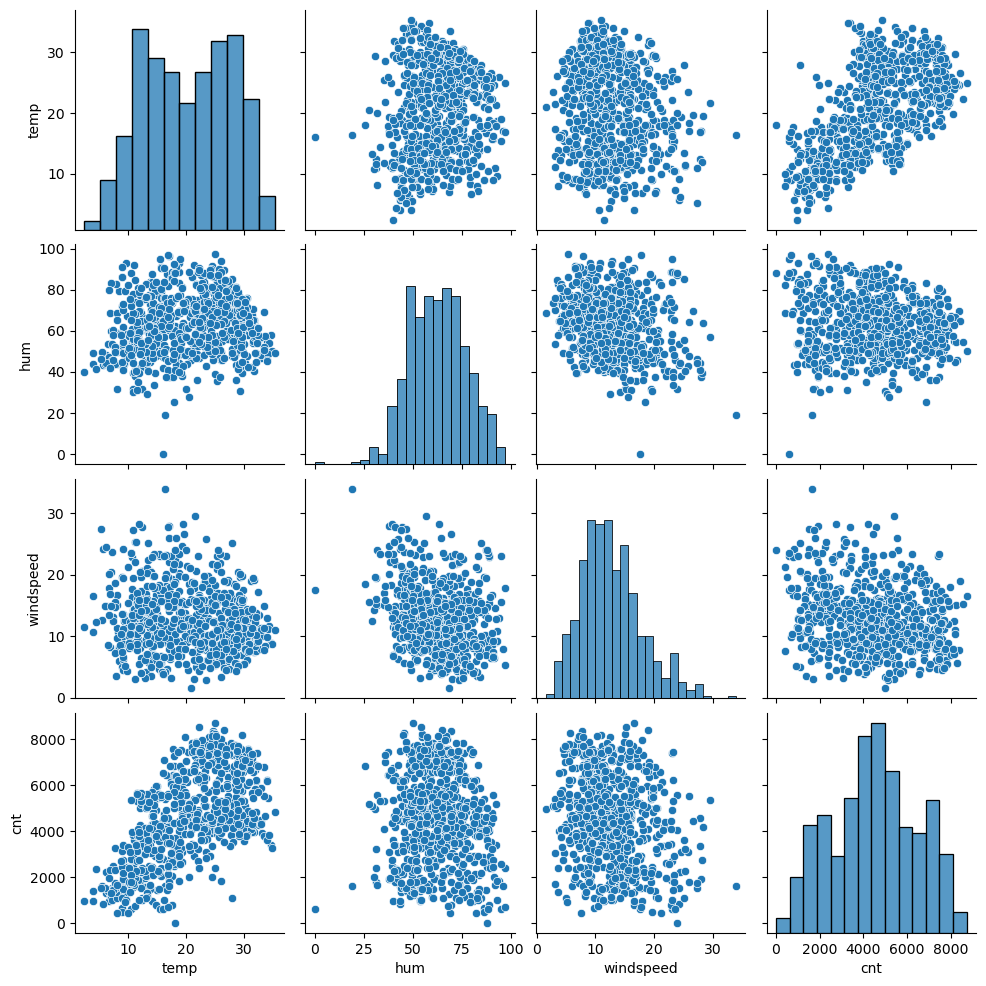

In [25]:
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(br_df, vars=["temp", "hum",'windspeed','cnt'])
plt.show()

As we can see from the graph above, there is strong correlation between the count variable and temperature, humidity and windspeed. We shall explore these correlation with different variables further.

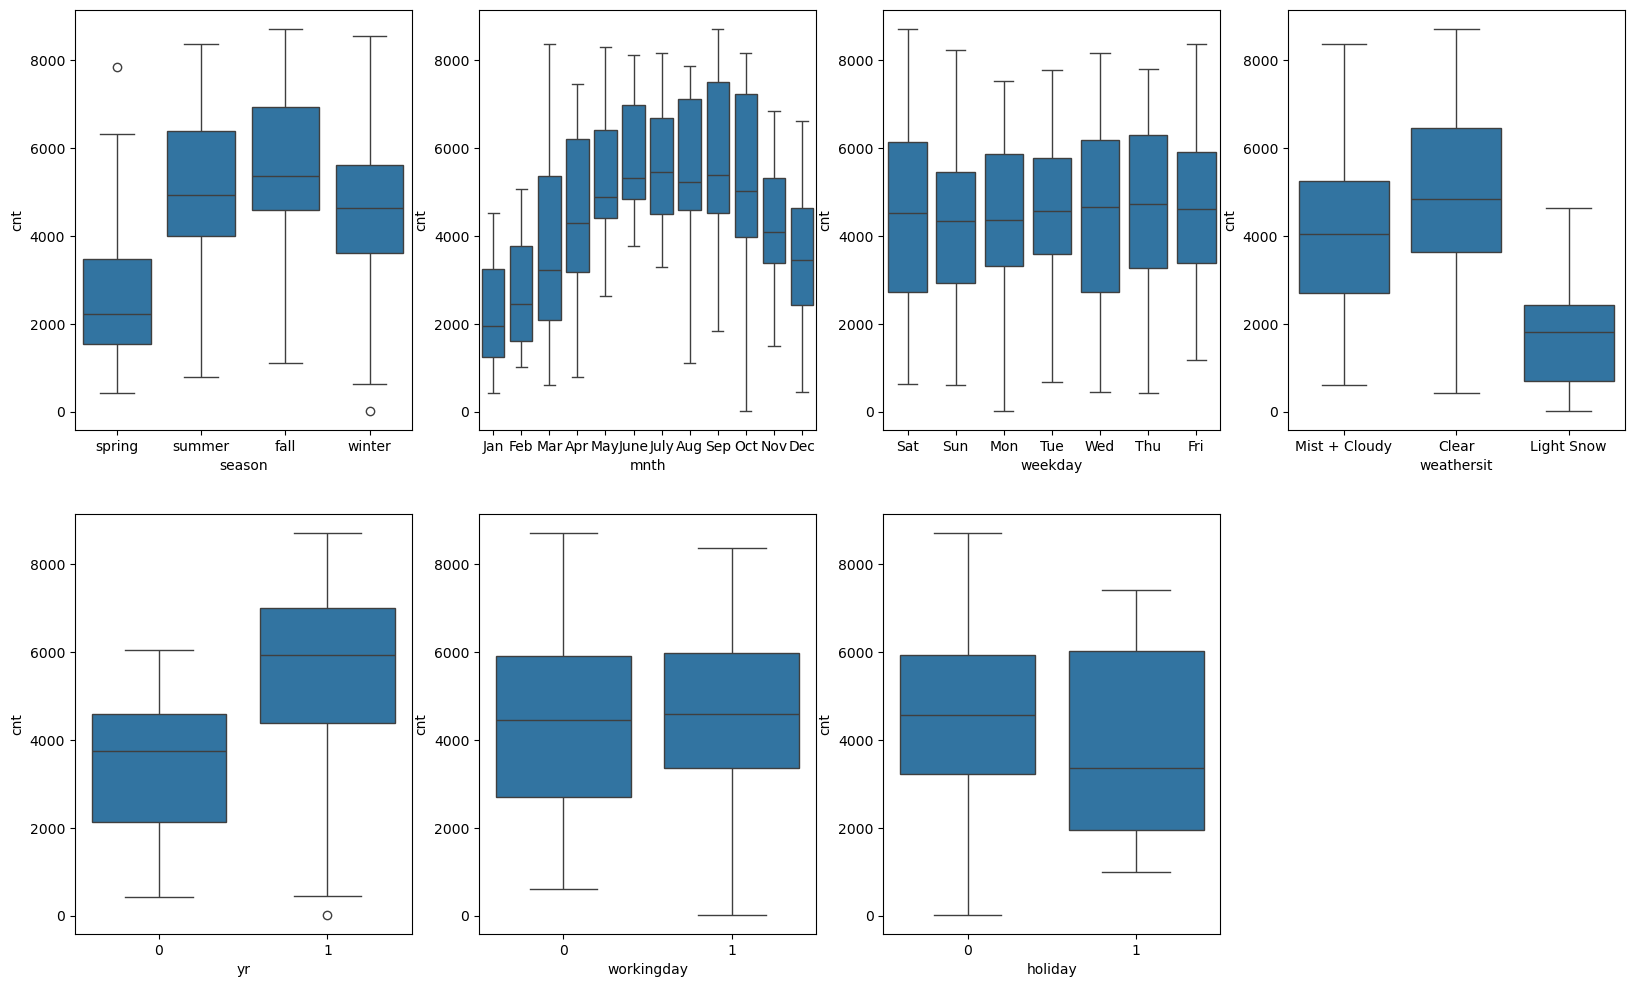

In [28]:
#visualizing the categorical variables of the dataset using boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=br_df)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=br_df)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=br_df)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=br_df)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=br_df)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=br_df)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=br_df)
plt.show()

Some of the observations from the plots above are as follows:
People are more likely to rent bikes in the summer and the fall season

Bike rental rates are the most in September and October

Saturday, Wednesday and Thursday are the days where more bikes are rented

Most bike rentals take place in the clear weather

More bikes were rented in 2019

There is no big discernable difference in bike rental rates depending on whether it's a working day or not

Bike rental rates are higher on holidays

In [31]:
#dropping below columns, because dummy values already generated
br_df = br_df.drop(['mnth','weekday','weathersit','season'],axis =1)

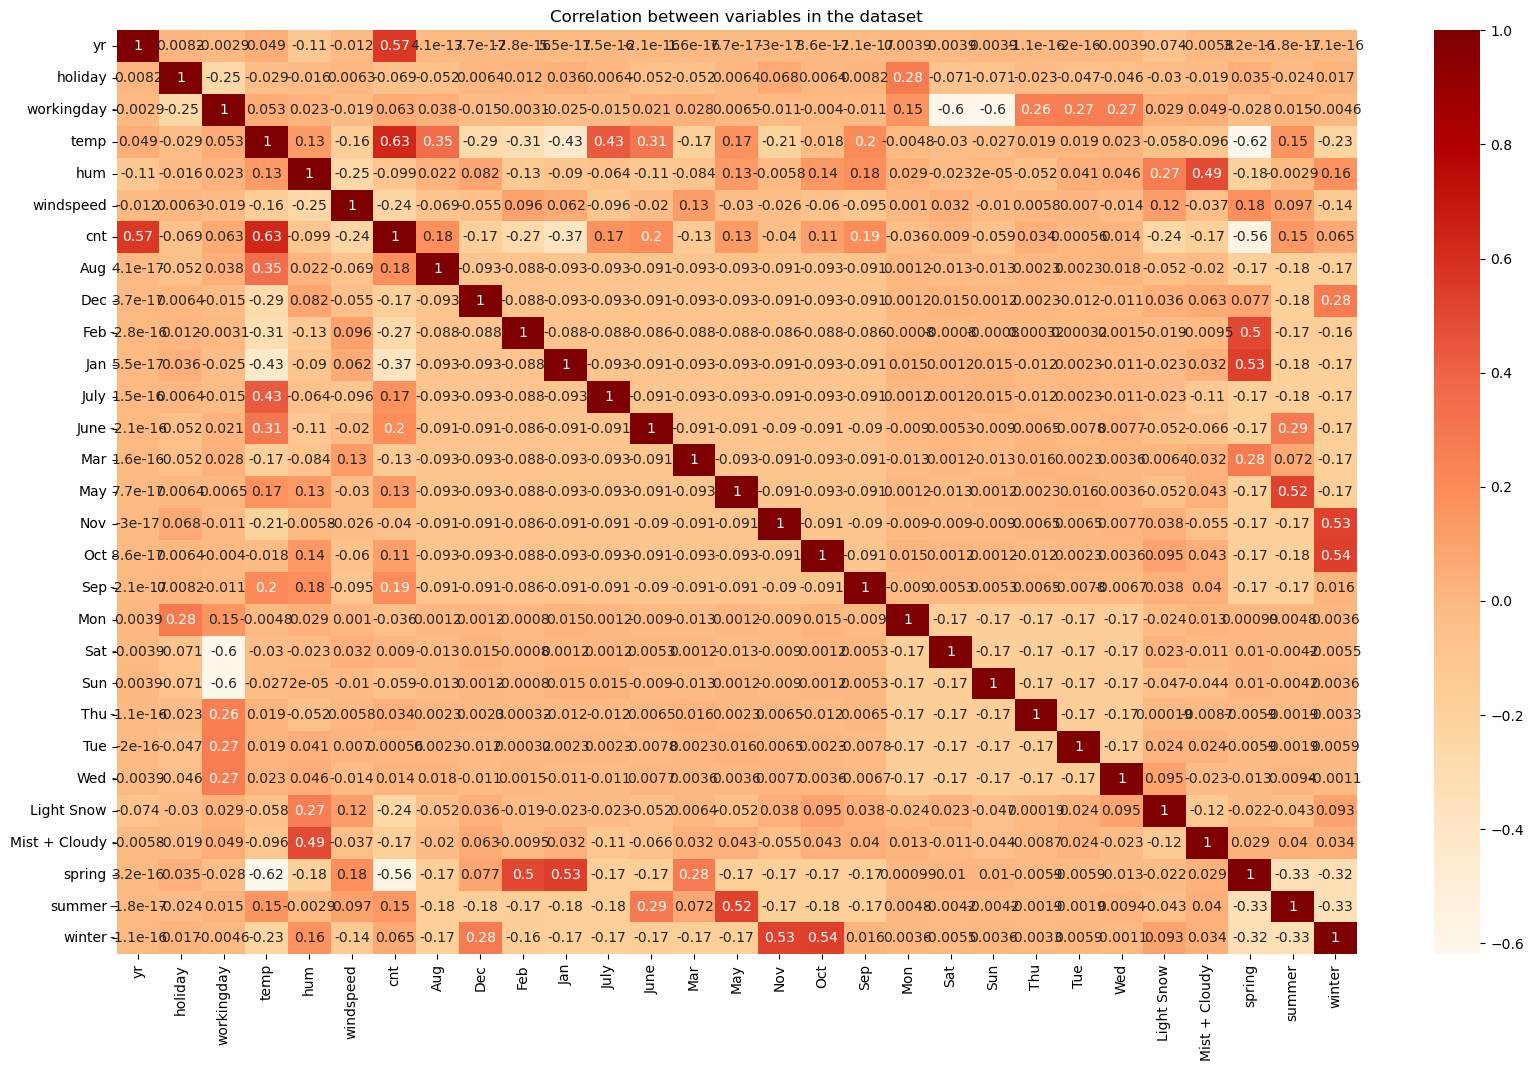

In [33]:
#making a heatmap to showcase correlation between the variables and decide whether we can perform linear regression on the dataset
plt.figure(figsize=(20, 12))
sns.heatmap(br_df.corr(), cmap='OrRd', annot=True)
plt.title('Correlation between variables in the dataset')
plt.show()

from the above heat map temp having 0.63 more correlation with output dependent variable cnt

#### Step 2: Preparing the data for model training (train-test split, rescaling)

In [37]:
#splitting the dataset into train and test sets
df_train, df_test = train_test_split(br_df, train_size=0.7, random_state=100)

In [39]:
#checking the shape of the training dataset
print(df_train.shape)
#checking the shape of the test dataset
print(df_test.shape)

(510, 29)
(220, 29)


##### Scaling the variables

In [42]:
#we have to rescale the variables like hum, temp, windspeed, cnt as they have large values as compared to the other variables of the dataset
#we have to normalize these values using the scaler.fit_transform() 
scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
df_train[scaler_var] = scaler.fit_transform(df_train[scaler_var])

In [44]:
#checking the normalized values of the train set after performing scaling 
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


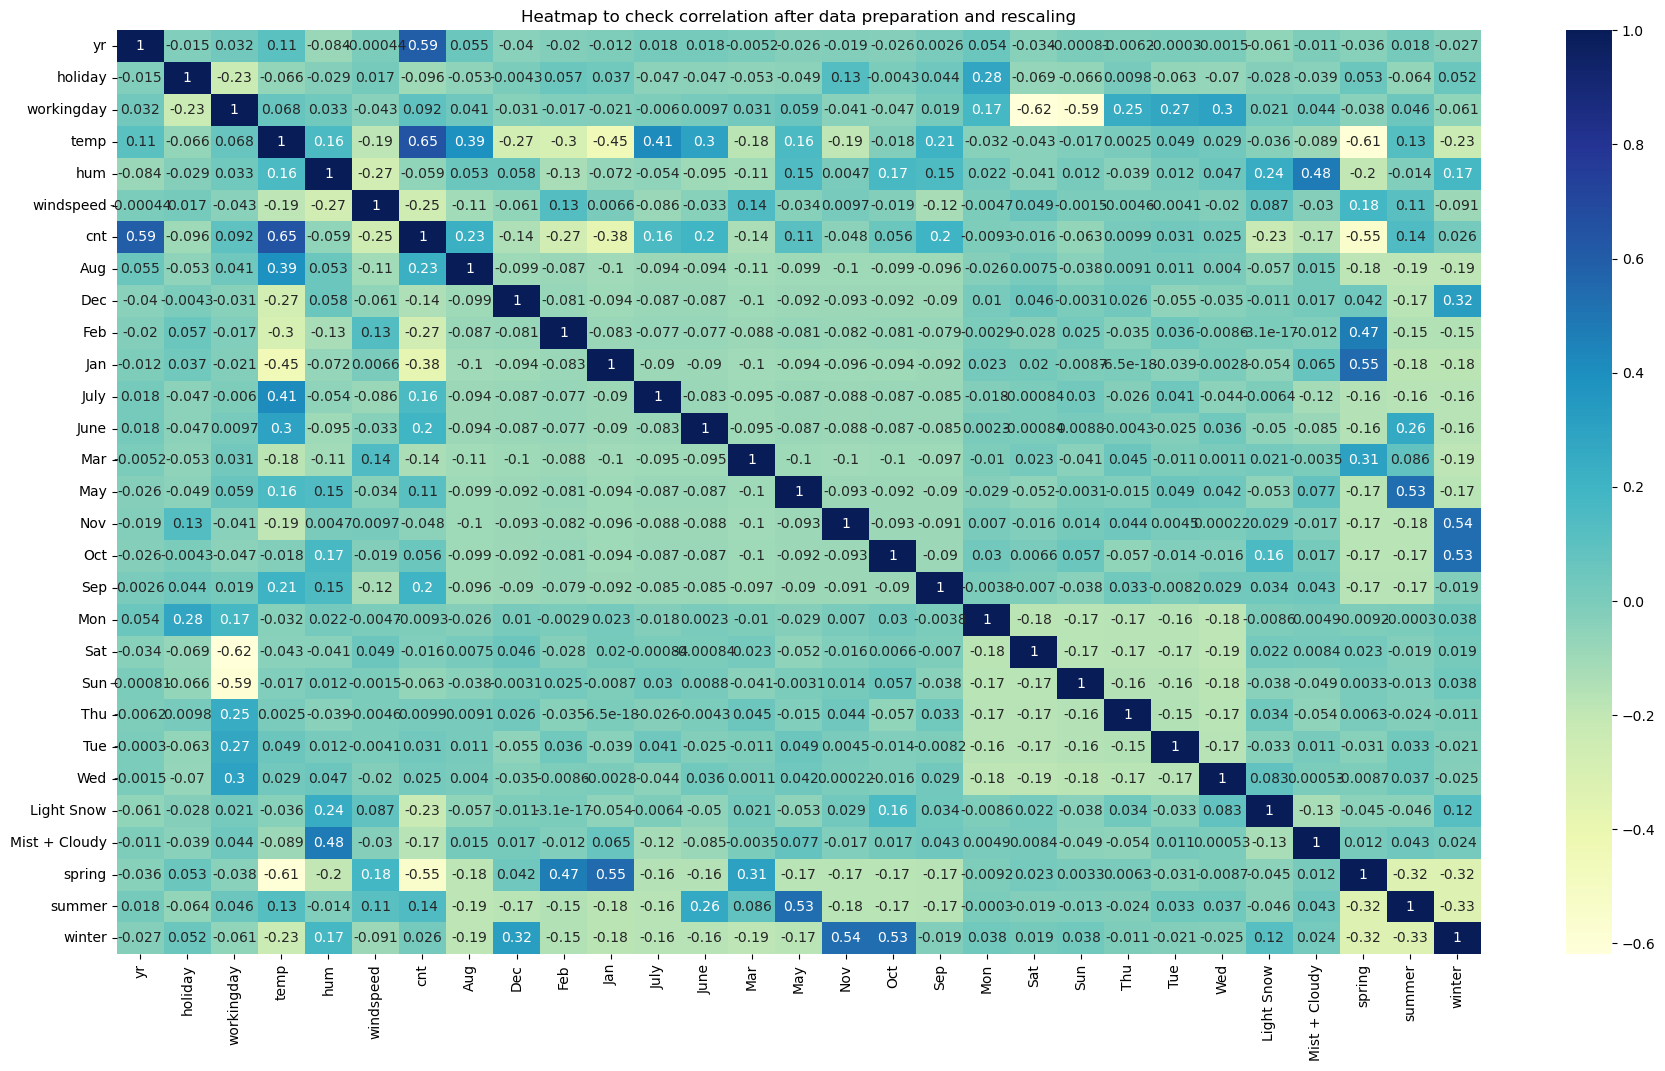

In [46]:
# checking the correlation coefficients to see which variables are highly correlated post data preparation and rescaling

plt.figure(figsize = (22, 12))
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True)
plt.title('Heatmap to check correlation after data preparation and rescaling')
plt.show()

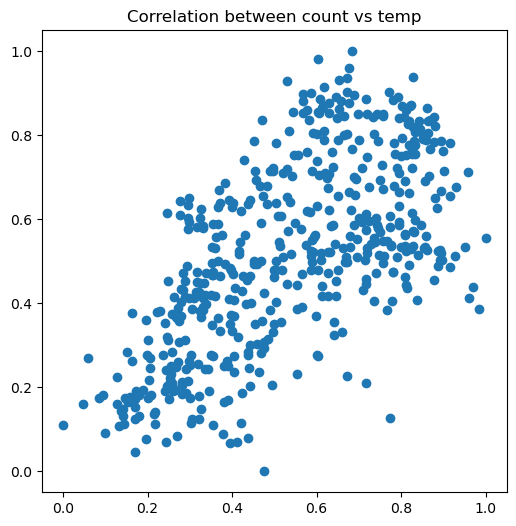

In [48]:
#checking for correlation between count and temp using a pairplot
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Correlation between count vs temp')
plt.show()

#### Step 3: Training the model

In [51]:
#building our first model using the variable temp
#preparing the variables for model building 

y_train = df_train.pop('cnt')
X_train = df_train

## Using RFE: <br>
We have found out the R-squared values and the best fit lines using the manual approach for feature selection. We will now using the automated approach for selecting the values required for building the most optimized models and dropping the values which are redundant for our model building approach. We will now use RFE for automated approach, along with VIF to determine the variables to drop.

In [54]:
#print(f'total columns in df {X_train}')

#creating the RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

#setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

#fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train, y_train)

In [56]:
#checking the elements selected and the ones rejected in a list after rfe
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [58]:
#getting the selected feature variables in one one variable
true_rfe = X_train.columns[rfe.support_]

In [60]:
#checking the values of true_rfe
print(true_rfe)
print(len(true_rfe))

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')
15


In [62]:
def getConstant(traindata):
    #adding constant to training variable
    X_train_rfe = sm.add_constant(traindata)

    return X_train_rfe;
    

def getLM(traindata):

    #creating first training model with rfe selected variables
    lr = sm.OLS(y_train, traindata)

    #fit
    lr_model = lr.fit()
    
    return lr_model

def printLMSummary(model):
    print(model.summary())

def getVIF(pd, lmXtrainrfe):
    #dropping the constant variables from the dataset
    X_train_vfi = lmXtrainrfe.drop(['const'], axis = 1)
    #calculating the VIF of the model
    vif = pd.DataFrame()
    X = X_train_vfi
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

In [64]:
X_train_rfe1 = getConstant(X_train[true_rfe])
lm1 = getLM(X_train_rfe1)
printLMSummary(lm1)
vf1 = getVIF(pd,X_train_rfe1)
vf1

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          4.22e-191
Time:                        18:52:16   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Mist + Cloudy,2.29
0,yr,2.09
9,Sat,1.98


How to check the conditions for variables elimination?
Here are some of the potential conditions which can be helpful while deciding which variables to check. These conditions are formulated after studying the VIF, p-values and going through the course content.

High p-value, high VIF : definitely drop

High-Low:

High p, low VIF : remove these first, then build model again and check VIF again
Low p, high VIF : remove these later
Low p-value, low VIF : keep variable

In [66]:
#hum variable can be dropped due to high p value and low VIF
X_train_new_1 = X_train_rfe1.drop(['Jan'], axis = 1)

In [68]:
X_train_rfe2 = getConstant(X_train_new_1)
lm1 = getLM(X_train_rfe2)
printLMSummary(lm1)
vf1 = getVIF(pd,X_train_rfe2)
vf1

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          2.11e-191
Time:                        18:54:25   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2402      0.036      6.714

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
11,spring,4.24
13,winter,3.42
12,summer,2.85
10,Mist + Cloudy,2.29
0,yr,2.08
8,Sat,1.97


In [74]:
#temp variable can be dropped due high VIF value
X_train_new_2 = X_train_rfe2.drop(['hum'], axis = 1)

In [76]:
X_train_rfe2 = getConstant(X_train_new_2)
lm2 = getLM(X_train_rfe2)
printLMSummary(lm2)
vf2 = getVIF(pd,X_train_rfe2)
vf2

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          1.28e-188
Time:                        18:56:03   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1576      0.031      5.126

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
10,spring,2.49
11,summer,2.34
0,yr,2.07
12,winter,1.98
7,Sat,1.96
5,July,1.58
9,Mist + Cloudy,1.57


In [78]:
#workingday variable can be dropped due high p value and low VIF
X_train_new_3 = X_train_rfe2.drop(['holiday'], axis = 1)
X_train_rfe3 = getConstant(X_train_new_3)
lm3 = getLM(X_train_rfe3)
printLMSummary(lm3)
vf3 = getVIF(pd,X_train_rfe3)
vf3

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          7.12e-189
Time:                        18:57:10   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1492      0.031      4.881

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
9,spring,2.38
10,summer,2.32
0,yr,2.07
11,winter,1.91
6,Sat,1.83
4,July,1.58
8,Mist + Cloudy,1.57


In [80]:
#Windspeed seems to be insignificant,by looking at high VIF and negative correlation with count. Lets drop it
X_train_new_4 = X_train_rfe3.drop(['windspeed'], axis = 1)
X_train_rfe4 = getConstant(X_train_new_4)
lm4 = getLM(X_train_rfe4)
printLMSummary(lm4)
vf4 = getVIF(pd,X_train_rfe4)
vf4

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.1
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          1.94e-182
Time:                        19:00:25   Log-Likelihood:                 487.95
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     498   BIC:                            -901.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0989      0.030      3.248

,Features,VIF
2,temp,6.03
1,workingday,4.63
0,yr,2.07
9,summer,2.06
5,Sat,1.81
8,spring,1.78
10,winter,1.73
3,July,1.58
7,Mist + Cloudy,1.57
4,Sep,1.34


In [82]:
#July column can be dropped due to its p value and low VIF
X_train_new_5 = X_train_rfe4.drop(['July'], axis = 1)
X_train_rfe5 = getConstant(X_train_new_5)
lm4 = getLM(X_train_rfe5)
printLMSummary(lm4)
vf4 = getVIF(pd,X_train_rfe5)
vf4

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.7
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          3.10e-182
Time:                        19:02:19   Log-Likelihood:                 484.63
No. Observations:                 510   AIC:                            -947.3
Df Residuals:                     499   BIC:                            -900.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0902      0.030      2.964

,Features,VIF
2,temp,4.72
1,workingday,4.63
0,yr,2.07
4,Sat,1.81
8,summer,1.75
7,spring,1.70
9,winter,1.59
6,Mist + Cloudy,1.57
3,Sep,1.23
5,Light Snow,1.07


#### Step 4: Residual analysis

In [91]:
X_train_rfe5

,const,yr,workingday,temp,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter
576,1.0,1,1,0.815169,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0,1,0,1,1,0,0
728,1.0,1,0,0.245101,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0,1,0,1,0,1,0
111,1.0,0,1,0.345824,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0,0,0,0,0,0,0
53,1.0,0,1,0.202618,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0,1,0,1,0,0,1
79,1.0,0,1,0.462664,0,0,0,1,0,1,0


In [97]:
#y train predicted
y_train_pred = lm4.predict(X_train_rfe5)

<Figure size 640x480 with 0 Axes>

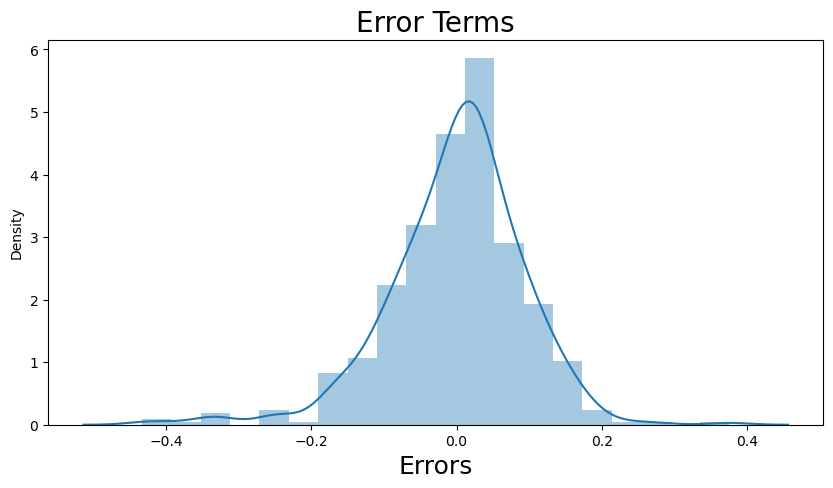

In [101]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(10,5))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

We can see Error terms are normally distributed

## Step 5: Making Predictions Using the Final Model


In [107]:
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
df_test[scaler_var] = scaler.fit_transform(df_test[scaler_var])

In [111]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.546074,0.508362,0.418803,0.517923,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.248645,0.200875,0.187683,0.239498,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.361079,0.284201,0.361045,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.491299,0.403318,0.520681,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.650989,0.523975,0.687956,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
y_test = df_test.pop('cnt')
X_test = df_test

In [116]:
X_train_rfe5.columns # training columns

Index(['const', 'yr', 'workingday', 'temp', 'Sep', 'Sat', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [123]:
# Now let's use our model to make predictions.

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new1 = X_test_new1[X_train_rfe5.columns]

X_test_new1.head()

,const,yr,workingday,temp,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter
184,1.0,0,0,0.837241,0,0,0,1,0,0,0
535,1.0,1,1,0.911423,0,0,0,0,0,1,0
299,1.0,0,1,0.496221,0,0,0,1,0,0,1
221,1.0,0,1,0.890387,0,0,0,0,0,0,0
152,1.0,0,1,0.821739,0,0,0,0,0,1,0


In [127]:
# Making predictions using the fourth model

y_test_pred = lm4.predict(X_test_new1)

## Step 6: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [133]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.8080237096136123

In [135]:
r2_score(y_train,y_train_pred)

0.8258727706905458

Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

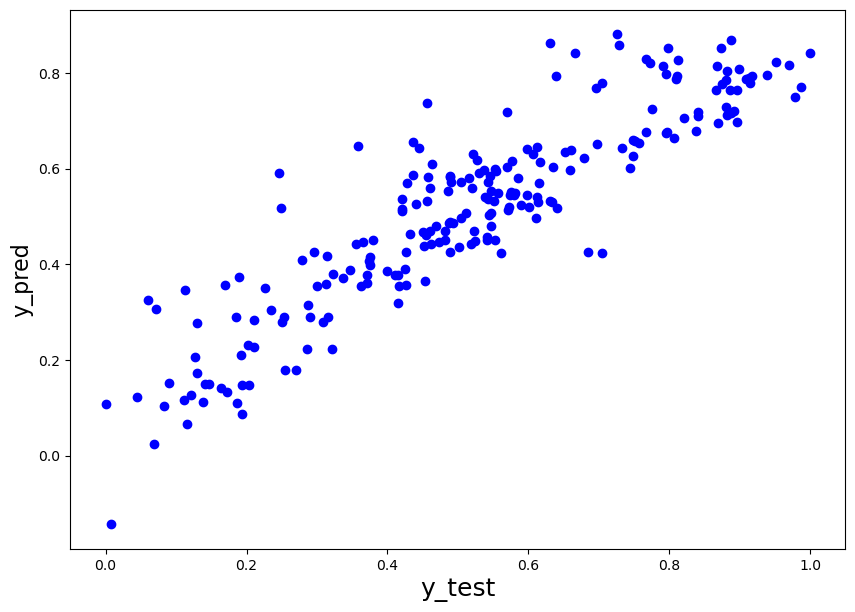

In [141]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(10,7))
plt.scatter(y_test,y_test_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

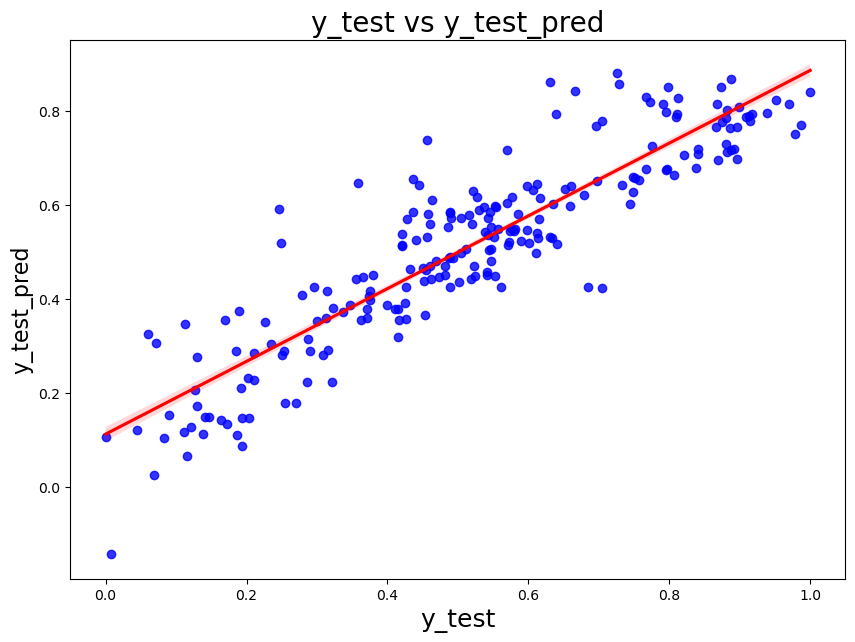

In [147]:
#Regression plot
plt.figure(figsize=(10,7))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

###### Equation of the best fitted line is:
    cnt = 0.2334×yr + 0.0566 x workingday + 0.4914 x temp + 0.0916 x sep + 0.0645 x sat -0.3041 x lignt snow -0.0786 x MistCloudy -0.0650 x spring +0.0527 x summer +0.0970 x winter 

    

In [162]:
#finding out the mean squared error 
from sklearn.metrics import mean_squared_error

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_test_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.008752673405469206
Mean squared error of the test set is 0.010961587965828763


Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets

###### Summary:

The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-

1) The R-squared value of the train set is 82.6% whereas the test set has a value of 80.8% which suggests that our model broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model. 

2) Our developed model's mean squared error is almost 0 on both the training and testing datasets which suggests that the variance is accurately predicted on the test set. The p-values and VIF were used to select the significant variables. RFE was also conducted for automated selection of variables.  

3) We can conclude that the bike demands for the BoomBikes is company is dependent on the temperature and whether it is a workingday or not. Additionally more rentals seem to be demanded on the winters as compared to the summer and spring. We had observed that the months of September and October had higher use of rentals. In terms of days the maximum focus was on days like Wed, Thurs and Sat and more on holidays. 

4) These interpretations help us derive meaningful insights in the bike rental market and the behaviour of the people. One of the recommendations based on this model are that there should be aggressive marketing in the summer and spring season to drive up rentals. Since the summer months also show low rental levels, a strong marketing strategy for the first 6 months of the year can assist in driving up the rental numbers. There has to be an approach required to introduce more users on days where the weather is less clear, perhaps with incentives or strategic deals. Rentals were more in 2019 than 2018 which suggests that over time more people would be exposed to this idea and there has to a strong analysis done to retain the repeat customers. 